In [ ]:
# GIthub가 PuTTY를 접속하는 과정

# name: deploy # deploy 이란 이름으로 환경 구성

# Controls when the workflow will run
# on: # bot
#   # Triggers the workflow on push or pull request events but only for the main branch
#   push: # push가 될때마다 작동, 바꿔도 됨
#     branches: 
#       - main # 브랜치의 버전이 푸쉬 될때마다  job을 실행


# jobs:
#   SSH: # ssh 접속함
#     runs-on: ubuntu-latest # PuTTY에

#     steps:
#       - uses: actions/checkout@v3 # 내 소스코드를 가져옴
#       - name: ssh to ec2 # ec2 접속
#         uses: appleboy/ssh-action@master
#         with:
#           key: ${{ secrets.SSH_PRIVATE_KEY }} # 내 github 프라이빗 key
#           host: ${{ secrets.HOST }} # 내가 HOST에 등록한 IP로 github가 접속함
#           username: ${{ secrets.USER }} # 내가 등록한 아이디
#           script: |
#             cd Github/Kmeans_app/                        
#             git pull # 레파지토리 프라이빗이면 맨 밑줄 실행

#   깃허브 레파지토리가 프라이빗으로 만들어져 있을때. 
#   git pull https://${{ secrets.GIT_USER }}:${{ secrets.GIT_PASSWORD }}@github.나의 리포지토리 주소.git

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv(r"C:\Users\5\My_Study\crawling_result\RSB_DataSet.csv") ; df



,Ranking,Country,Score,Political Context,Economic Context,Legal Framework,Safety Score,Sociocultural Context
0,1,Norway,92.65,94.89,90.38,92.23,92.03,93.71
1,2,Denmark,90.27,94.34,83.67,89.18,92.97,91.17
2,3,Sweden,88.84,91.96,87.66,90.27,84.14,90.18
3,4,Estonia,88.83,91.11,81.97,87.87,93.20,90.00
4,5,Finland,88.42,90.40,82.03,86.64,92.26,90.77
...,...,...,...,...,...,...,...,...
175,176,Myanmar,25.03,40.40,29.25,20.18,4.63,30.67
176,177,Turkmenistan,25.01,25.00,11.73,29.61,35.69,23.00
177,178,Iran,23.22,34.14,21.32,26.71,13.61,23.78
178,179,Eritrea,19.62,22.22,19.73,25.15,11.36,19.67


In [21]:
df.describe()

,Ranking,Score,Political Context,Economic Context,Legal Framework,Safety Score,Sociocultural Context
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,90.500000,58.231389,57.068667,45.063556,62.634611,60.402889,66.337056
std,52.105662,17.222379,17.163598,16.669385,18.081832,24.368745,18.037360
min,1.000000,13.920000,22.220000,0.000000,15.790000,4.630000,12.000000
25%,45.750000,45.120000,43.790000,32.762500,52.065000,41.060000,54.875000
50%,90.500000,59.145000,55.820000,42.365000,66.080000,66.665000,68.900000
75%,135.250000,71.120000,70.082500,54.050000,77.222500,80.152500,81.232500
max,180.000000,92.650000,94.890000,90.380000,92.230000,96.460000,95.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ranking                180 non-null    int64  
 1   Country                180 non-null    object 
 2   Score                  180 non-null    float64
 3   Political Context      180 non-null    float64
 4   Economic Context       180 non-null    float64
 5   Legal Framework        180 non-null    float64
 6   Safety Score           180 non-null    float64
 7   Sociocultural Context  180 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 11.4+ KB


In [35]:
df.isna().sum()

Ranking                  0
Country                  0
Score                    0
Political Context        0
Economic Context         0
Legal Framework          0
Safety Score             0
Sociocultural Context    0
dtype: int64

In [40]:
df.iloc[ : , 2 :  ] 

,Score,Political Context,Economic Context,Legal Framework,Safety Score,Sociocultural Context
0,92.65,94.89,90.38,92.23,92.03,93.71
1,90.27,94.34,83.67,89.18,92.97,91.17
2,88.84,91.96,87.66,90.27,84.14,90.18
3,88.83,91.11,81.97,87.87,93.20,90.00
4,88.42,90.40,82.03,86.64,92.26,90.77
...,...,...,...,...,...,...
175,25.03,40.40,29.25,20.18,4.63,30.67
176,25.01,25.00,11.73,29.61,35.69,23.00
177,23.22,34.14,21.32,26.71,13.61,23.78
178,19.62,22.22,19.73,25.15,11.36,19.67


In [69]:
X= df.drop(labels='Country', axis=1) ; X

,Ranking,Score,Political Context,Economic Context,Legal Framework,Safety Score,Sociocultural Context
0,1,92.65,94.89,90.38,92.23,92.03,93.71
1,2,90.27,94.34,83.67,89.18,92.97,91.17
2,3,88.84,91.96,87.66,90.27,84.14,90.18
3,4,88.83,91.11,81.97,87.87,93.20,90.00
4,5,88.42,90.40,82.03,86.64,92.26,90.77
...,...,...,...,...,...,...,...
175,176,25.03,40.40,29.25,20.18,4.63,30.67
176,177,25.01,25.00,11.73,29.61,35.69,23.00
177,178,23.22,34.14,21.32,26.71,13.61,23.78
178,179,19.62,22.22,19.73,25.15,11.36,19.67


<Axes: >

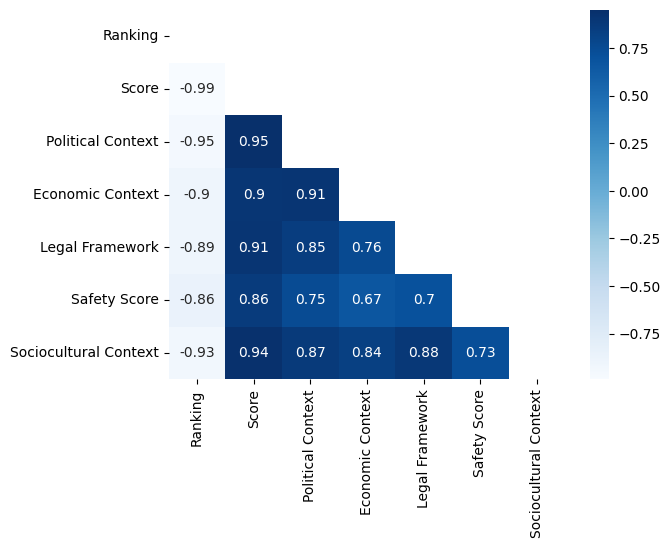

In [70]:
mask=np.zeros_like(X.corr())
mask[np.triu_indices_from(mask)]=True
sns.heatmap(X.corr(), annot=True, cmap="Blues", mask=mask)